[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W3/W3P5.ipynb)

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")


def to_dataframe(text):
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

In [ ]:
download_data()
os.listdir()   ### make sure that you are at the right directory

['d-aapl0305.txt',
 'd-ibm3dx7008.txt',
 'd-sp55008.txt',
 'd-vix0810.txt',
 'm-3m4608.txt',
 'm-aaa-1911.txt',
 'm-baa-1911.txt',
 'm-dec125910-6111.txt',
 'm-dec12910.txt',
 'm-deciles08.txt',
 'm-ibm3dx2608.txt',
 'm-ibm3dx2609.txt',
 'm-ibmsp6709.txt',
 'm-unrate-4811.txt',
 'q-gdp4708.txt',
 'q-gdpc96.txt',
 'q-gnp4710.txt',
 'q-GNPC96.txt',
 'q-jnj-earns-9211.txt',
 'q-ko-earns8309.txt',
 'w-gs1yr.txt',
 'w-gs3yr.txt',
 'w-tb3ms.txt',
 'w-tb6ms.txt']

In [ ]:
try:
    data = to_dataframe('q-gnp4710.txt')
except Exception as ex:
    print(f"Something is wrong with directories or {ex}")

In [ ]:
data

,Year,Mon,Dat,VALUE
0,1947,1,1,238.1
1,1947,4,1,241.5
2,1947,7,1,245.6
3,1947,10,1,255.6
4,1948,1,1,261.7
...,...,...,...,...
248,2009,1,1,14172.2
249,2009,4,1,14164.2
250,2009,7,1,14281.9
251,2009,10,1,14442.8


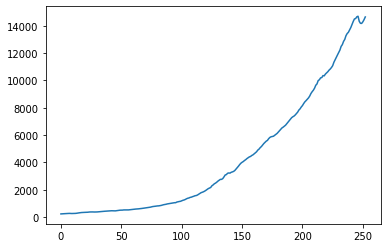

In [ ]:
plt.plot(data["VALUE"])

 # For some specific reasons we apply some transformations to our data!

In [ ]:
data_log =  data.iloc[:, -1].apply(np.log)   ###applying log transformation here

In [ ]:
data_log_diff = data_log.diff() ### the first difference
data_log_diff = data_log_diff[1:] ### avoid N/A value


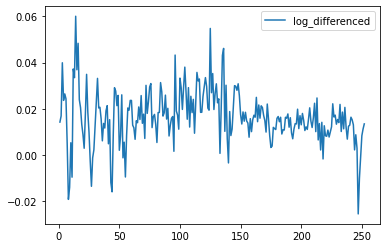

In [ ]:
plt.plot(data_log_diff, label = "log_differenced")
plt.legend()
plt.show()

In [ ]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(endog = data_log_diff, order = (3,0,0))
fit_model = model.fit()

In [ ]:
fit_model.aic

-1677.7633387345027

In [ ]:
aic_ = []
bic_ = []
for i in range(0,15):
  model = ARIMA(endog = data_log_diff, order = (i,0,0))
  fit_model = model.fit()
  aic_.append(fit_model.aic)
  bic_.append(fit_model.bic)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
aic_ = np.array(aic_)
bic_ = np.array(bic_) #### we transform everything to numpy arrays for brevity.

In [ ]:
aic_ + abs(np.min(aic_))   ### to get the same results as in the book

array([77.76387822, 11.91300776,  8.79080429,  4.66511567,  6.27692813,
        5.938889  ,  5.10143556,  4.59800774,  6.57913901,  0.        ,
        0.63989952,  2.6280889 ,  2.08872548,  4.06755703,  0.17846331])

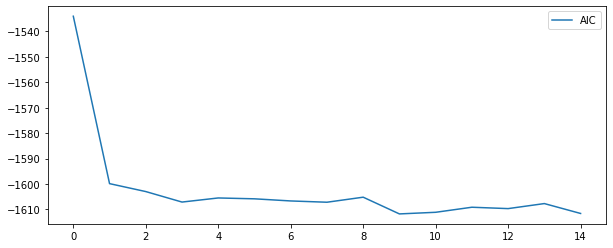

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(aic_, label = "AIC")
plt.legend()
plt.show()

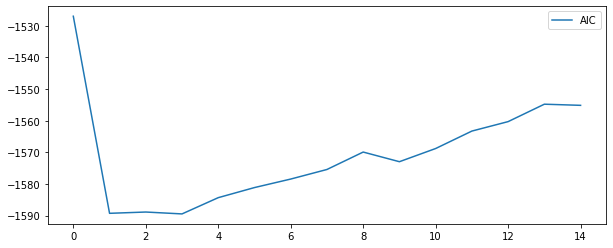

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(bic_, label = "BIC")
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

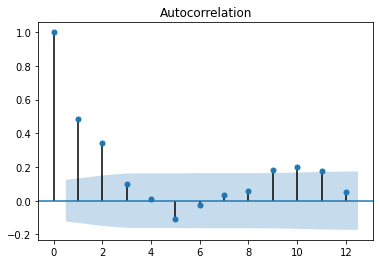

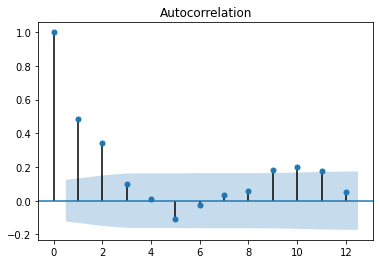

In [ ]:
plot_acf(data_log_diff, lags = 12)

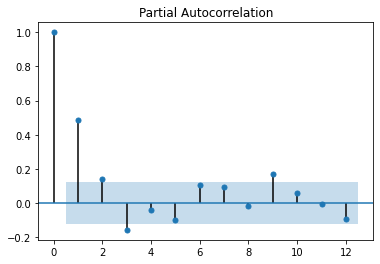

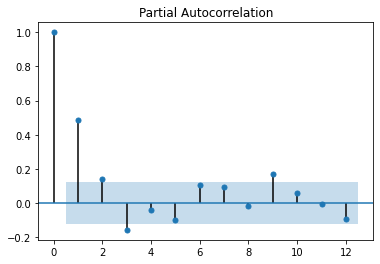

In [ ]:
plot_pacf(data_log_diff, lags = 12)

#What is your conclusion? Which p value would you choose in this case?

###Hold up! There is a better way!

In [ ]:
from statsmodels.tsa.ar_model import ar_select_order

In [ ]:
T = ar_select_order(data_log_diff, maxlag = 12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [ ]:
T.aic

{(1, 2, 3): -9.322531691296716,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): -9.321384197587161,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): -9.319126382547413,
 (1, 2, 3, 4): -9.314327692011338,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): -9.313310744812236,
 (1, 2, 3, 4, 5): -9.312684138880329,
 (1, 2): -9.31252934183289,
 (1, 2, 3, 4, 5, 6): -9.312487544666105,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): -9.310868105822323,
 (1, 2, 3, 4, 5, 6, 7): -9.310393279120541,
 (1, 2, 3, 4, 5, 6, 7, 8): -9.30213392934647,
 (1,): -9.29569265611525,
 0: -9.025805416360422}

In [ ]:
T.bic

{(1, 2): -9.269021355291116,
 (1,): -9.266687331754067,
 (1, 2, 3): -9.26452104257435,
 (1, 2, 3, 4): -9.241814381108378,
 (1, 2, 3, 4, 5): -9.22566816579678,
 (1, 2, 3, 4, 5, 6): -9.210968909401965,
 (1, 2, 3, 4, 5, 6, 7): -9.194371981675808,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): -9.176357575781246,
 (1, 2, 3, 4, 5, 6, 7, 8): -9.171609969721144,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): -9.159597098560905,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): -9.136836159655223,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): -9.124776136464543,
 0: -9.01130275417983}

###Let's fit AR(3) model and see what we can do!

In [ ]:
model = ARIMA(endog = data_log_diff, order = (3,0,0))
fit_model = model.fit()

In [ ]:
dir(fit_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_data_in_cache',
 '_fixed_params',
 '_fixed_params_index',
 '_free_params_index',
 '_get_robustcov_results',
 '_has_fixed_params',
 '_init_kwds',
 '_news_previous_data',
 '_news_previous_results',
 '_news_updated_data',
 '_news_updated_results',
 '_params_ar',
 '_params_exog',
 '_params_variance',
 '_rank',
 '_states',
 '_use_t',
 'aic',
 'aicc',
 'append',
 'apply',
 'arfreq',
 'arparams',
 '

(array([ 1.,  1.,  3.,  6.,  8., 27., 64., 65., 40., 19.,  9.,  3.,  2.,
         3.,  1.]),
 array([-0.03669285, -0.03168481, -0.02667677, -0.02166873, -0.01666069,
        -0.01165265, -0.00664461, -0.00163657,  0.00337147,  0.00837951,
         0.01338755,  0.01839559,  0.02340363,  0.02841167,  0.03341971,
         0.03842774]),
 <a list of 15 Patch objects>)

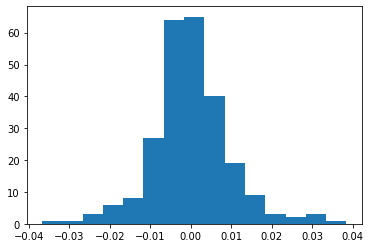

In [ ]:
plt.hist(fit_model.resid,bins = 15)

In [ ]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                  252
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 808.558
Date:                Mon, 26 Sep 2022   AIC                          -1607.117
Time:                        09:51:06   BIC                          -1589.470
Sample:                             0   HQIC                         -1600.016
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.001     13.251      0.000       0.014       0.019
ar.L1          0.4386      0.053      8.276      0.000       0.335       0.542
ar.L2          0.2062      0.055      3.759      0.000       0.099       0.314
ar.L3         -0.1560      0.048     -3.219      0.001      -0.251      -0.061
sigma2      9.546e-05    5.8e-06     16.467      0.000    8.41e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                63.74
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
residual = fit_model.resid  #### this dude should behave like a white noise. 

In [ ]:
np.mean(residual)  #### it is almost of mean 0

2.3287157130293046e-05

In [ ]:
np.std(residual, ddof = 1) ### here the standard deviation is pretty close to 0

0.00979418578640709

In [ ]:
statsmodels.stats.diagnostic.acorr_ljungbox(residual, lags = 12, return_df = True) 

,lb_stat,lb_pvalue
1,0.007139,0.932667
2,0.027236,0.986474
3,0.693583,0.874712
4,0.753688,0.944547
5,6.181356,0.288970
6,6.448308,0.374886
7,7.293440,0.398980
8,8.334128,0.401531
9,11.497422,0.243147
10,16.029148,0.098801


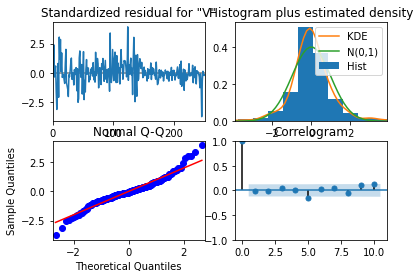

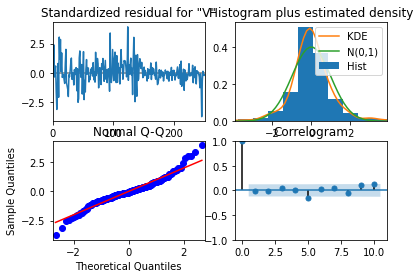

In [ ]:
fit_model.plot_diagnostics()

#How do we forecast? 

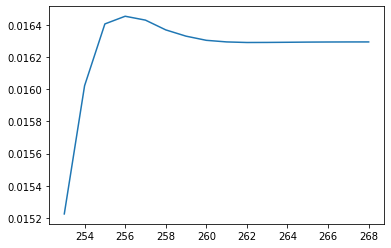

In [ ]:
plt.plot(fit_model.forecast(16))   #### length to the right   this is called out-of-sample prediction, some dudes call this forecast.

In [ ]:
np.mean(data_log_diff)   ##### yeeeeeeaaah you see it converges to the mean if you like to forecast longer ranges!

0.016343881294275952

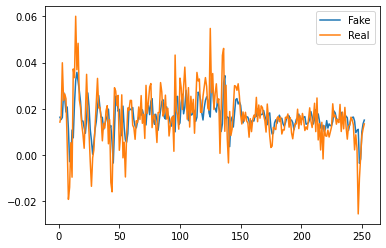

In [ ]:
plt.plot(fit_model.predict(), label = "Fake")   #### called insample prediction
plt.plot(data_log_diff, label = "Real")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_log_diff, fit_model.predict())  
### this guy should be close to 1 for outsample forecasts. You see some sparks are not well explained, thats why r2 value is pretty low even on train set.

0.2700501886123492